# 1. Load Data

- Programmatically download and load into your favorite analytical tool the transactions data. The data is in line-delimited JSON format

- Please describe the structure of the data. Number of records and fields in each record?

- Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [1]:
#A set of modules and libraries used in the data processing and modeling

import warnings
warnings.simplefilter('ignore')

import json
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [2]:
#Load json data and format and into pandas dataframe
data = []
with open('transactions.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [3]:
with open('data.json', 'wb') as f:
    data_str = json.dumps(data)
    f.write(bytes(data_str,'utf-8'))

In [4]:
df = pd.read_json('data.json')

In [5]:
#Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
accountNumber               786363 non-null int64
accountOpenDate             786363 non-null object
acqCountry                  786363 non-null object
availableMoney              786363 non-null float64
cardCVV                     786363 non-null int64
cardLast4Digits             786363 non-null int64
cardPresent                 786363 non-null bool
creditLimit                 786363 non-null int64
currentBalance              786363 non-null float64
currentExpDate              786363 non-null object
customerId                  786363 non-null int64
dateOfLastAddressChange     786363 non-null object
echoBuffer                  786363 non-null object
enteredCVV                  786363 non-null int64
expirationDateKeyInMatch    786363 non-null bool
isFraud                     786363 non-null bool
merchantCategoryCode        786363 non-null object
merchantCity                7863

- We have 29 fields and 786,363 records


- We can see that some of the date variables are objects; hence, they need to be formatted to date variables

In [7]:
#Formatting date variables into Pandas datetime format and replacing missing values to nan

df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

df = df.replace('', np.nan)


In [8]:
#TimeSpan of transaction data 
df['transactionDateTime'].describe(include='All')

count                  786363
unique                 776637
top       2016-05-28 14:24:41
freq                        4
first     2016-01-01 00:01:02
last      2016-12-30 23:59:45
Name: transactionDateTime, dtype: object

In [9]:
#View the head of the dataset

df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,737265056,2015-03-14,US,5000.0,414,1803,False,5000,0.0,2023-06-01,...,Uber,NaN,NaN,01,02,NaN,NaN,98.55,2016-08-13 14:27:32,PURCHASE
1,737265056,2015-03-14,US,5000.0,486,767,True,5000,0.0,2024-02-01,...,AMC #191138,NaN,NaN,01,09,NaN,NaN,74.51,2016-10-11 05:05:54,PURCHASE
2,737265056,2015-03-14,US,5000.0,486,767,False,5000,0.0,2025-08-01,...,Play Store,NaN,NaN,01,09,NaN,NaN,7.47,2016-11-08 09:18:39,PURCHASE
3,737265056,2015-03-14,US,5000.0,486,767,False,5000,0.0,2025-08-01,...,Play Store,NaN,NaN,01,09,NaN,NaN,7.47,2016-12-10 02:14:50,PURCHASE
4,830329091,2015-08-06,US,5000.0,885,3143,True,5000,0.0,2029-10-01,...,Tim Hortons #947751,NaN,NaN,01,02,NaN,NaN,71.18,2016-03-24 21:04:46,PURCHASE


In [10]:
#Number of unique accounts
df['accountNumber'].unique().shape

(5000,)

In [11]:
#Summary statistics
df.describe()

,accountNumber,availableMoney,cardCVV,cardLast4Digits,creditLimit,currentBalance,customerId,echoBuffer,enteredCVV,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd,transactionAmount
count,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,7.863630e+05,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0,786363.000000
mean,5.372326e+08,6250.725369,544.467338,4757.417799,10759.464459,4508.739089,5.372326e+08,NaN,544.183857,NaN,NaN,NaN,NaN,NaN,136.985791
std,2.554211e+08,8880.783989,261.524220,2996.583810,11636.174890,6457.442068,2.554211e+08,NaN,261.551254,NaN,NaN,NaN,NaN,NaN,147.725569
min,1.000881e+08,-1005.630000,100.000000,0.000000,250.000000,0.000000,1.000881e+08,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,3.301333e+08,1077.420000,310.000000,2178.000000,5000.000000,689.910000,3.301333e+08,NaN,310.000000,NaN,NaN,NaN,NaN,NaN,33.650000
50%,5.074561e+08,3184.860000,535.000000,4733.000000,7500.000000,2451.760000,5.074561e+08,NaN,535.000000,NaN,NaN,NaN,NaN,NaN,87.900000
75%,7.676200e+08,7500.000000,785.000000,7338.000000,15000.000000,5291.095000,7.676200e+08,NaN,785.000000,NaN,NaN,NaN,NaN,NaN,191.480000
max,9.993896e+08,50000.000000,998.000000,9998.000000,50000.000000,47498.810000,9.993896e+08,NaN,998.000000,NaN,NaN,NaN,NaN,NaN,2011.540000


In [12]:
#Let us look at the count of missing values for each variable

df.isna().sum()

accountNumber                    0
accountOpenDate                  0
acqCountry                    4562
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  786363
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                786363
merchantCountryCode            724
merchantName                     0
merchantState               786363
merchantZip                 786363
posConditionCode               409
posEntryMode                  4054
posOnPremises               786363
recurringAuthInd            786363
transactionAmount                0
transactionDateTime              0
transactionType     

- The list of variables that appear to have no records in the dataset are: echoBuffer, merchantCity, merchantZip, merchantState, posOnPremises, and recurringAuthInd.


- Variables posEntryMode, transactionType, posConditionCode, merchantCountryCode, and acqCountry show missing values; but very small compared to the total record.

In [13]:
#Let us remove the variables with no-records as they are not used for the subsequent analyses

df = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip',  'posOnPremises', 'recurringAuthInd'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
accountNumber               786363 non-null int64
accountOpenDate             786363 non-null datetime64[ns]
acqCountry                  781801 non-null object
availableMoney              786363 non-null float64
cardCVV                     786363 non-null int64
cardLast4Digits             786363 non-null int64
cardPresent                 786363 non-null bool
creditLimit                 786363 non-null int64
currentBalance              786363 non-null float64
currentExpDate              786363 non-null datetime64[ns]
customerId                  786363 non-null int64
dateOfLastAddressChange     786363 non-null datetime64[ns]
enteredCVV                  786363 non-null int64
expirationDateKeyInMatch    786363 non-null bool
isFraud                     786363 non-null bool
merchantCategoryCode        786363 non-null object
merchantCountryCode         785639 non-null object
merchant

# 2. Plot

- Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
- Report any structure you find and any hypotheses you have about that structure.

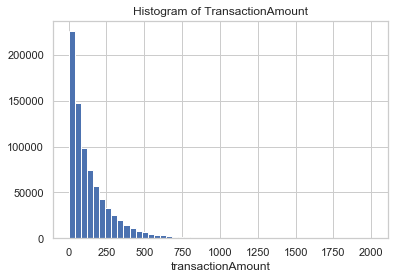

In [15]:
#Histogram of transactionAmount
plt.hist(df['transactionAmount'], bins=50, histtype='bar', align='mid', orientation='vertical')

plt.title('Histogram of TransactionAmount')
plt.xlabel('transactionAmount')
plt.show()

In [16]:
#Summary of transactionAmount
df['transactionAmount'].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

- The histogram shows that most transaction amounts are small. At least 75% of the transactions are less than 200 dollars. The average transaction is 136, with a large standard deviation of 147. One take away from the distribution is that large transaction dollars are rare.

# 3. Data Wrangling - Duplicate Transactions

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

Can you programmatically identify reversed and multi-swipe transactions?
What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
Did you find anything interesting about either kind of transaction?

In [17]:
#Let us filter important transaction features to count duplicate transactions. 
#Inspecting transactionType, we can see that transaction types are ADDRESS_VERIFICATION, PURCHASE, and Reversal
df_tran = df[['accountNumber', 'customerId', 'transactionAmount', 'merchantName','transactionType' ]]

In [18]:
#Let us create a dataset only for the duplicated transactions
dupDF = df_tran[df_tran.duplicated()]

In [19]:
#Count transaction types
dupDF["transactionType"].value_counts()

PURCHASE                50817
ADDRESS_VERIFICATION     5946
REVERSAL                   33
Name: transactionType, dtype: int64

In [20]:
#Count transaction types
dupDF["transactionType"].value_counts()

PURCHASE                50817
ADDRESS_VERIFICATION     5946
REVERSAL                   33
Name: transactionType, dtype: int64

In [22]:
#Pivot Table to calculate number of transactions and transaction amounts

pivot = pd.pivot_table(data=dupDF, index=['transactionType'],
                      values=['transactionAmount'], aggfunc=[np.sum, len])

In [23]:
pivot.query('transactionType == ["ADDRESS_VERIFICATION", "PURCHASE", "REVERSAL","" ]')

,sum,len
,transactionAmount,transactionAmount
transactionType,,
ADDRESS_VERIFICATION,0.00,5946.0
PURCHASE,2361375.49,50817.0
REVERSAL,310.95,33.0


- We can see that the number of reversal transactions are 33, and the total reversal dollar amount is 310.95

- If duplicates are not reversal, the remaining duplicates are multi-swipe transactions. Hence the number of multi-swipe transactions is (50,817 + 5946) = 56,763. The total multi-swipe transactions dollar amount is 2,361,375.49.


# 4. Model

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
Provide an estimate of performance using an appropriate sample, and show your work.
Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

-	The main objective is to identify transactions that are more likely to be fraudulent. This could be learned using statistical algorithms using some of the data provided in account behavior. The model can be used to identify whether transactions are fraudulent or not based on the statistical model developed on observed behavior.

## 4.1 Data Exploration to Build a Predictive Model

In [25]:
#We can see that 'isFraud' is a Boolean, and needs to be converted to binary integer for quantification purposes: 
#1 for a transaction that is fraud and 0 for not-fraud


df.isFraud[df.isFraud == 'false'] = 0
df.isFraud[df.isFraud == 'true'] = 1

df['isFraud']=df['isFraud'].astype(float)

In [26]:
#We can see how many fraud cases are out of the total transactions

df['isFraud'].value_counts()

0.0    773946
1.0     12417
Name: isFraud, dtype: int64

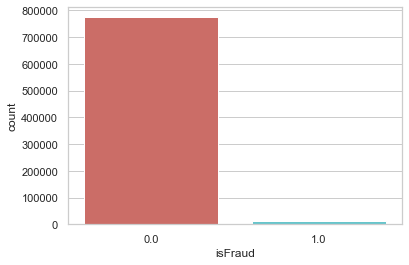

<Figure size 432x288 with 0 Axes>

In [27]:
sns.countplot(x='isFraud', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [28]:
#Let us see the percentage of fraud transactions
count_no_fraud = len(df[df['isFraud']==0])
count_fraud = len(df[df['isFraud']==1])
pct_no_fraud = count_no_fraud/df['isFraud'].count()
print("Percentage of no-fraud", pct_no_fraud*100)
pct_fraud = count_fraud/df['isFraud'].count()
print("Percentage of fraud", pct_fraud*100)

Percentage of no-fraud 98.420958259735
Percentage of fraud 1.579041740264992


- We can see that only 1.57% of the transactions are fraud. This lends some evidence on how the data imbalance is for fraud cases in training the model.

In [29]:
#Given the null values are small for variables with non-missing values, we can drop null values from the dataset without applying any imputations.
#Let us also drop ID types of variables that will not be useful as predictors
df = df.drop(['accountNumber', 'acqCountry', 'customerId', 'merchantName', 'cardLast4Digits','accountOpenDate',
              'currentExpDate','dateOfLastAddressChange', 'transactionDateTime'], axis=1).dropna()


In [30]:
#View the updated list of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780489 entries, 0 to 786362
Data columns (total 14 columns):
availableMoney              780489 non-null float64
cardCVV                     780489 non-null int64
cardPresent                 780489 non-null bool
creditLimit                 780489 non-null int64
currentBalance              780489 non-null float64
enteredCVV                  780489 non-null int64
expirationDateKeyInMatch    780489 non-null bool
isFraud                     780489 non-null float64
merchantCategoryCode        780489 non-null object
merchantCountryCode         780489 non-null object
posConditionCode            780489 non-null object
posEntryMode                780489 non-null object
transactionAmount           780489 non-null float64
transactionType             780489 non-null object
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 78.9+ MB


In [31]:
#Let us observe how the mean of the predictor variables is distributed along the fraud/no-fraud class.
df.groupby('isFraud').mean()

,availableMoney,cardCVV,cardPresent,creditLimit,currentBalance,enteredCVV,expirationDateKeyInMatch,transactionAmount
isFraud,,,,,,,,
0.0,6249.815168,544.211975,0.451380,10752.144232,4502.329064,543.924014,0.00133,135.601112
1.0,6147.537000,562.415642,0.279505,11070.416390,4922.879390,562.063996,0.00108,225.036713


- The average transaction amount appears to be significantly larger for the fraud case (225) compared to the no-fraud case (135). 

- CardPresent appears to be larger for no-fraud (.45) compared to fraud (.27). 


## 4.2 Create Dummy Variables of the Predictors

- Some of the account behavior variables are categorical in nature. For the purpose of statistical learning, we transformed them into variable categories (binary value - 0/1) where the observance of the specific category is 1.

In [33]:
#For ease of handling variable names with their categories, let us shorten the lengthy variable names

df = df.rename({'expirationDateKeyInMatch': 'exrDtKeyMatch','merchantCategoryCode':'merchCategory', 'merchantCountryCode':'merchCountry', 
                'transactionAmount':'transAmount', 'posConditionCode': 'posCondition', 'transactionType': 'transType'}, axis=1)

In [34]:
#Create dummies for the categorical variables
cat_vars=['cardPresent','exrDtKeyMatch','merchCategory', 'merchCountry', 'posCondition', 'posEntryMode', 
          'transType']


for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_vars=['cardPresent','exrDtKeyMatch','merchCategory', 'merchCountry', 'posCondition', 'posEntryMode', 
          'transType']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [35]:

df_final=df[to_keep]
df_final.columns.values

array(['availableMoney', 'cardCVV', 'creditLimit', 'currentBalance',
       'enteredCVV', 'isFraud', 'transAmount', 'cardPresent_False',
       'cardPresent_True', 'exrDtKeyMatch_False', 'exrDtKeyMatch_True',
       'merchCategory_airline', 'merchCategory_auto',
       'merchCategory_cable/phone', 'merchCategory_entertainment',
       'merchCategory_fastfood', 'merchCategory_food',
       'merchCategory_food_delivery', 'merchCategory_fuel',
       'merchCategory_furniture', 'merchCategory_gym',
       'merchCategory_health', 'merchCategory_hotels',
       'merchCategory_mobileapps', 'merchCategory_online_gifts',
       'merchCategory_online_retail',
       'merchCategory_online_subscriptions',
       'merchCategory_personal care', 'merchCategory_rideshare',
       'merchCategory_subscriptions', 'merchCountry_CAN',
       'merchCountry_MEX', 'merchCountry_PR', 'merchCountry_US',
       'posCondition_01', 'posCondition_08', 'posCondition_99',
       'posEntryMode_02', 'posEntryMode_05', 

In [36]:
#format the variables's binary values for ease of oversampling
df_final = df_final.astype(float)

## 4.3 Create (update) the data for Modeling using Sampling Technique

- We can see that the fraud cases are only 1.57%, and it statistically reasonable to oversample the population for a better statistical learning of classification algorithm.

- Studies have shown that over-sampling the minority class and under-sampling the majority (normal) class can achieve better classifier performance. In this case, we will try over-sampling the minority class using a method called Synthetic Minority Over-sampling Technique (SMOTE)

- Our goal is to have equal number of fraud/no-fraud observation using a synthetic oversampling

- Once we have an oversampled dataset, we will create traning and test samples for model fitting and performance testing purposes. We used 70/30% proporation for traning and testing given we have a descent amout of data records (about a million records after oversampling). 

In [37]:
#Import the module for SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [38]:
#Let us create separate datasets for the dependent (y) and independent variables
X = df_final.loc[:,df_final.columns != 'isFraud']
y = df_final.loc[:,df_final.columns == 'isFraud']


In [39]:
#We created training and test datasets based on 70/30 % proportion
os = SMOTE(random_state=0)
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
columns = X_train.columns 

In [40]:
columns

Index(['availableMoney', 'cardCVV', 'creditLimit', 'currentBalance',
       'enteredCVV', 'transAmount', 'cardPresent_False', 'cardPresent_True',
       'exrDtKeyMatch_False', 'exrDtKeyMatch_True', 'merchCategory_airline',
       'merchCategory_auto', 'merchCategory_cable/phone',
       'merchCategory_entertainment', 'merchCategory_fastfood',
       'merchCategory_food', 'merchCategory_food_delivery',
       'merchCategory_fuel', 'merchCategory_furniture', 'merchCategory_gym',
       'merchCategory_health', 'merchCategory_hotels',
       'merchCategory_mobileapps', 'merchCategory_online_gifts',
       'merchCategory_online_retail', 'merchCategory_online_subscriptions',
       'merchCategory_personal care', 'merchCategory_rideshare',
       'merchCategory_subscriptions', 'merchCountry_CAN', 'merchCountry_MEX',
       'merchCountry_PR', 'merchCountry_US', 'posCondition_01',
       'posCondition_08', 'posCondition_99', 'posEntryMode_02',
       'posEntryMode_05', 'posEntryMode_09', 'posEn

In [43]:
#create oversampled datasets using SMOTE
os_data_X, os_data_y = os.fit_sample(X_train, y_train)

In [44]:
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['isFraud'])

In [45]:
#Let us inspect the new oversampled data

print("Length of oversampled data is ", len(os_data_X))

Length of oversampled data is  1075934


In [46]:
print("The number of isFraud in oversampled data is ", len(os_data_y[os_data_y['isFraud']==1]))

The number of isFraud in oversampled data is  537967


In [47]:
print("The number of is not Fraud in oversampled data is ", len(os_data_y[os_data_y['isFraud']==0]))

The number of is not Fraud in oversampled data is  537967


In [48]:
print("Proportion of Fraud in oversampled data is", 
      len(os_data_y[os_data_y['isFraud']==1])/len(os_data_X))

Proportion of Fraud in oversampled data is 0.5


We oversampled only on the training dataset. None of the information used in the test data is being used to create synthetic observations.

## 4.4 Feature Selection Using Recursive feature elimination (RFE)


- Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable (fraud/not-fraud). Logistic regression is estimating the parameters of a logistic model (a form of binary regression).

- We have our oversampled dataset ready. Let us use a Python module (scikit-learn) to select statistically significant features. Recursive feature elimination (RFE) feature selection algorithm in scikit-learn to select features by recursively considering smaller and smaller sets of features.

In [49]:
df_final_vars = df_final.columns.values.tolist()

In [50]:
#rename the dependent variable (isFraud) to y
y=['isFraud']

In [51]:
#list of predictive featutes
X = [i for i in df_final_vars if i not in y]

In [52]:
#import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [53]:
logreg = LogisticRegression()

In [54]:
#fit RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False False False False False False False
 False  True False False False  True False False]
[24 22 25 23 21 20 15  5  6 14  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  2  1  1 19 16  9 10  4  3  8 17  1  7 13 18  1 11 12]


Based on RFE, we have selected the following features. We will eliminate statistically insignificant variables to refine the model.

In [55]:
#List of selected features using RFE

cols1=['merchCategory_airline', 'merchCategory_auto','merchCategory_cable/phone', 'merchCategory_entertainment',
'merchCategory_fastfood', 'merchCategory_food','merchCategory_food_delivery', 'merchCategory_fuel',
'merchCategory_furniture', 'merchCategory_gym','merchCategory_health', 'merchCategory_hotels',
'merchCategory_mobileapps', 'merchCategory_online_gifts','merchCategory_online_retail',
'merchCategory_online_subscriptions','merchCategory_rideshare','merchCategory_subscriptions', 'posEntryMode_05', 
'transType_ADDRESS_VERIFICATION'] 

X=os_data_X[cols1]
y=os_data_y['isFraud']

## 4.5 Selected Features Model Fitting

- We will use statsmodels.api to estimate the selected model. Our dependent variables is a binary outcome (0/1). Hence, we will use a Logit model.

In [56]:
#Fit the model using the selected features
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.608307
         Iterations: 35


/Users/zelalemabahana/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                               Results: Logit
Model:                            Logit                          Pseudo R-squared:               0.122       
Dependent Variable:               isFraud                        AIC:                            1309036.8817
Date:                             2020-11-11 03:33               BIC:                            1309274.6557
No. Observations:                 1075934                        Log-Likelihood:                 -6.5450e+05 
Df Model:                         19                             LL-Null:                        -7.4578e+05 
Df Residuals:                     1075914                        LLR p-value:                    0.0000      
Converged:                        0.0000                         Scale:                          1.0000      
No. Iterations:                   35.0000                                                                    
----------------------------------------------------------

The following variables not statistically; hence, we will drop them: 

- merchCategory_cable/phone
- merchCategory_food_delivery
- merchCategory_fuel
- merchCategory_gym
- merchCategory_mobileapps
- merchCategory_online_subscriptions

In [60]:
#Updated list of selected features using RFE
cols2=['merchCategory_airline', 'merchCategory_auto','merchCategory_entertainment','merchCategory_fastfood', 
'merchCategory_food','merchCategory_furniture', 'merchCategory_health', 'merchCategory_hotels', 
'merchCategory_online_gifts','merchCategory_online_retail', 'merchCategory_online_subscriptions',
'merchCategory_rideshare', 'posEntryMode_05', 'transType_ADDRESS_VERIFICATION']

X=os_data_X[cols2]
y=os_data_y['isFraud']

In [61]:
#Fit the model using the selected features
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.625055
         Iterations: 35


/Users/zelalemabahana/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.098       
Dependent Variable:        isFraud                 AIC:                     1345062.9301
Date:                      2020-11-11 03:39        BIC:                     1345229.3719
No. Observations:          1075934                 Log-Likelihood:          -6.7252e+05 
Df Model:                  13                      LL-Null:                 -7.4578e+05 
Df Residuals:              1075920                 LLR p-value:             0.0000      
Converged:                 0.0000                  Scale:                   1.0000      
No. Iterations:            35.0000                                                      
----------------------------------------------------------------------------------------
                                    Coef.   Std.Err.     z     P>|z|    [0.025   0.975] 
----------------------------------------------------------

- We will further drop the following variables:
    
    - merchCategory_online_subscriptions

In [62]:
#Updated list of selected features using RFE
cols3=['merchCategory_airline', 'merchCategory_auto','merchCategory_entertainment','merchCategory_fastfood', 
'merchCategory_food','merchCategory_furniture', 'merchCategory_health', 'merchCategory_hotels',
'merchCategory_online_gifts','merchCategory_online_retail','merchCategory_rideshare', 'posEntryMode_05', 
'transType_ADDRESS_VERIFICATION']

X=os_data_X[cols3]
y=os_data_y['isFraud']

In [63]:
#Fit the model using the selected features
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.628710
         Iterations 5
                                 Results: Logit
Model:                   Logit                Pseudo R-squared:     0.093       
Dependent Variable:      isFraud              AIC:                  1352927.0566
Date:                    2020-11-11 03:40     BIC:                  1353081.6097
No. Observations:        1075934              Log-Likelihood:       -6.7645e+05 
Df Model:                12                   LL-Null:              -7.4578e+05 
Df Residuals:            1075921              LLR p-value:          0.0000      
Converged:               1.0000               Scale:                1.0000      
No. Iterations:          5.0000                                                 
--------------------------------------------------------------------------------
                                Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------

## 4.6 Model Performance Testing

- We have the model specification and coefficient estimation on the training set. Let us test the model performance on the test set. 

- Let us use the commonly used performance matrices for classification models: Confusion Matrix, Precision, Recall, and F-measure, and the ROC Curve.


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on the test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on the test set: 0.67


### i. Confusion Matrix

-  Confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The confusion matrix tells us the correct and incorrect predictions the model made on the test set.

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 98979  62174]
 [ 45654 115974]]


- Out of 322,781 test sets the model has:

    - Correct Predictions: 98979 + 115974 = 214,953

    - Incorrect Predictions: 45654 + 62174 = 107,828



### ii. Precision, Recall, Accuracy and F-measure

- Precision - ability of the clacifier not to label a sample as positive when it's negative.

- Recall - ability of the clacifier to find all positive samples.

- F-Beta weighted harmonic mean of the precision and recall. best value 1, worst 0.

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.61      0.65    161153
         1.0       0.65      0.72      0.68    161628

    accuracy                           0.67    322781
   macro avg       0.67      0.67      0.67    322781
weighted avg       0.67      0.67      0.67    322781



The model has a weighted average precision, recall and F-1 rate of about .67.

#### iii. ROC Curve

- An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

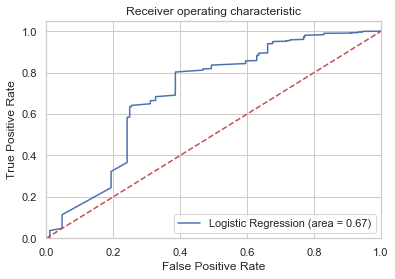

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- the model's performance in terms of ROC is .67.

# Conclusions and Next Steps:

Conclusions:

- We noticed that the fraud cases are only 1.57%, and it statistically reasonable to oversample the population for a better statistical learning of classification algorithm.
- Studies have shown that over-sampling the minority class and under-sampling the majority (normal) class can achieve better classifier performance. 
- we over-sampled the minority class using a method called Synthetic Minority Over-sampling Technique (SMOTE). Our goal is to have equal number of fraud/no-fraud observation using a synthetic oversampling.
- Once we have an oversampled dataset, we will create training and test samples for model fitting and performance testing purposes. We used 70/30% proportion for traning and testing given we have a descent amount of data records (about a million records after oversampling).
- We have the model specification and coefficient estimation on the training set. Let us test the model performance on the test set. 

- We used the commonly used performance matrices for classification models: Confusion Matrix, Precision, Recall, and F-measure, and the ROC Curve. 

- Out of 322,781 test sets the model has:

    - Correct Predictions: 98979 + 115974 = 214,953
    - Incorrect Predictions: 45654 + 62174 = 107,828

- The model has a weighted average precision, recall, accuracy and F-1 rates of about .67.

Next steps:

- Overall, the model performance can be improved by other measures:
    - using more advanced learning algorithms, such as Neural Nets and reinforcement learning
    - the data appears to be from a limited time period (2016). More historical data can provide more information for the algorithm to learn
    - discussing with the line of business on aquiring other relevant features can also help develop a more robust model
